# **Urban features as determinants of road safety**

This notebook was developed for the regression task of the paper "*Identifying urban features for vulnerable road user safety in Europe*".

Last update: 2022-01-25 <br>
Contact: mrnkln@outlook.com, (Marina Klanjčić)<br> gauvinlaetitia@gmail.com, (Laetitia Gauvin)

---

#### **Input variables** (standardized):
* city density
* cycling area share
* speed limited area share
* walking mode share
* cycling mode share
* motor vehicles mode share
* public transport mode share
* yearly average temperature
* yearly average precipitations
* average GDP per capita.

#### **Output variables** (normalized by population and standardized):
* Pedestrian - Car/Taxi
* Cyclist - Car/Taxi
* PTW occupant - Car/Taxi
* PTW occupant - Itself
* Car/Taxi occupant - Car/Taxi
* Car/Taxi occupant - Itself

#### **Imports:**

In [1]:
# importing all the libraries

import pandas as pd  
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt  
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

afont = {'fontname':'Arial'}
%matplotlib inline


/home/laetitia/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


#### **Parameters:**

In [2]:
# loading the data from GitHub
# IMPORTANT: adjust the path once you download the data locally

path = "./data/"
file = path + "urban_road_safety_data.csv"

data = pd.read_csv(file,index_col=0)
data

,Country Code,Country,City Code,City,Population,Density (pop./ sq km),Cycling area share,Speed limit area share,Mode - walking (%),Mode - cycling (%),...,Other Vehicles occ. - Itself,Other Vehicles occ. - Bicycle,Other Vehicles occ. - PTW,Other Vehicles occ. - Car/Taxi,Other Vehicles occ. - Bus/Coach,Other Vehicles occ. - Goods Vehicle,Other Vehicles occ. - Other Vehicles,Avg yearly precipitation (mm),Avg temperature (dgrC),Avg GDP per capita (EUR)
0,ES,Spain,8019,Barcelona,1620343,16014,0.150,0.775,32.0,2.00,...,0,0,0,2,1,0,0,565.0,18.2,31070.558005
1,ES,Spain,28079,Madrid,3223334,5332,0.067,0.065,34.0,0.46,...,0,0,0,4,0,1,0,420.9,15.0,35290.161722
2,FR,France,33063,Bordeaux,254436,5104,0.106,0.239,21.0,3.00,...,0,0,0,1,0,0,0,944.1,13.8,35464.542449
3,FR,France,59350,Lille,232787,6687,0.098,0.634,32.0,2.00,...,0,0,0,0,0,0,0,742.5,10.8,31291.929274
4,FR,France,69123,Lyon,516092,10758,0.109,0.284,34.0,2.00,...,1,0,0,4,0,0,1,831.9,12.5,48140.024006
5,FR,France,13055,Marseille,863310,3564,0.044,0.118,34.0,1.00,...,0,0,0,3,1,0,0,515.4,15.5,36231.610283
6,FR,France,34172,Montpellier,285121,4997,0.167,0.125,26.0,2.00,...,0,0,0,1,0,0,0,629.1,15.1,152178.007664
7,FR,France,44109,Nantes,309346,4704,0.327,0.354,27.0,5.00,...,0,0,0,0,0,0,0,819.5,12.5,36188.047875
8,FR,France,6088,Nice,340017,4586,0.056,0.102,40.0,1.00,...,0,0,0,0,0,0,0,733.0,16.0,36217.144057
9,FR,France,75056,Paris,2187526,20772,0.186,0.491,47.0,3.00,...,1,1,0,4,1,0,0,637.4,12.4,109123.014744


In [3]:
# keeping only the KSI pairs we are observing

data = data[['Country Code', 'Country', 'City Code', 'City', 'Population',
             'Density (pop./ sq km)', 'Cycling area share', 'Speed limit area share',
             'Mode - walking (%)', 'Mode - cycling (%)', 'Mode - public transport (%)', 'Mode - motor vehicles (%)','Avg yearly precipitation (mm)','Avg temperature (dgrC)','Avg GDP per capita (EUR)',
             'Pedestrian - Car/Taxi', 'Cyclist - Car/Taxi',
             'PTW occ. - Car/Taxi', 'PTW occ. - Itself', 
             'Car/Taxi occ. - Car/Taxi', 'Car/Taxi occ. - Itself']]
data

,Country Code,Country,City Code,City,Population,Density (pop./ sq km),Cycling area share,Speed limit area share,Mode - walking (%),Mode - cycling (%),...,Mode - motor vehicles (%),Avg yearly precipitation (mm),Avg temperature (dgrC),Avg GDP per capita (EUR),Pedestrian - Car/Taxi,Cyclist - Car/Taxi,PTW occ. - Car/Taxi,PTW occ. - Itself,Car/Taxi occ. - Car/Taxi,Car/Taxi occ. - Itself
0,ES,Spain,8019,Barcelona,1620343,16014,0.150,0.775,32.0,2.00,...,27.00,565.0,18.2,31070.558005,22,5,96,29,4,0
1,ES,Spain,28079,Madrid,3223334,5332,0.067,0.065,34.0,0.46,...,39.89,420.9,15.0,35290.161722,201,18,275,95,72,44
2,FR,France,33063,Bordeaux,254436,5104,0.106,0.239,21.0,3.00,...,67.00,944.1,13.8,35464.542449,13,5,14,2,1,3
3,FR,France,59350,Lille,232787,6687,0.098,0.634,32.0,2.00,...,56.00,742.5,10.8,31291.929274,5,1,7,2,6,2
4,FR,France,69123,Lyon,516092,10758,0.109,0.284,34.0,2.00,...,45.00,831.9,12.5,48140.024006,31,11,39,12,21,8
5,FR,France,13055,Marseille,863310,3564,0.044,0.118,34.0,1.00,...,54.00,515.4,15.5,36231.610283,56,9,146,45,48,30
6,FR,France,34172,Montpellier,285121,4997,0.167,0.125,26.0,2.00,...,64.00,629.1,15.1,152178.007664,21,4,21,8,12,9
7,FR,France,44109,Nantes,309346,4704,0.327,0.354,27.0,5.00,...,52.00,819.5,12.5,36188.047875,13,7,13,6,6,1
8,FR,France,6088,Nice,340017,4586,0.056,0.102,40.0,1.00,...,48.00,733.0,16.0,36217.144057,20,2,50,6,6,5
9,FR,France,75056,Paris,2187526,20772,0.186,0.491,47.0,3.00,...,17.00,637.4,12.4,109123.014744,58,14,132,48,24,12


In [4]:
# normalizing the target variables by population (per 1 million inhabitants) & removing the population column afterwards

data = data.copy()
data.iloc[:, 15:] = ((data.iloc[:, 15:].div(data.iloc[:, 4], axis=0))*1000000).round(2)
data.drop(['Population'], axis=1, inplace=True)
data
data.drop(['Mode - motor vehicles (%)'], axis=1, inplace=True)

In [5]:
# standardizing the input variables (urban features)

scalerx = StandardScaler(with_std=True)
data[['Density (pop./ sq km)', 'Cycling area share', 'Speed limit area share',
       'Mode - walking (%)', 'Mode - cycling (%)',
       'Mode - public transport (%)', 'Avg yearly precipitation (mm)',
       'Avg temperature (dgrC)', 'Avg income per capita (EUR)']]  = scalerx.fit_transform(data[['Density (pop./ sq km)', 'Cycling area share', 'Speed limit area share',
       'Mode - walking (%)', 'Mode - cycling (%)',
       'Mode - public transport (%)', 'Avg yearly precipitation (mm)',
       'Avg temperature (dgrC)', 'Avg GDP per capita (EUR)']])
data

,Country Code,Country,City Code,City,Density (pop./ sq km),Cycling area share,Speed limit area share,Mode - walking (%),Mode - cycling (%),Mode - public transport (%),Avg yearly precipitation (mm),Avg temperature (dgrC),Avg GDP per capita (EUR),Pedestrian - Car/Taxi,Cyclist - Car/Taxi,PTW occ. - Car/Taxi,PTW occ. - Itself,Car/Taxi occ. - Car/Taxi,Car/Taxi occ. - Itself,Avg income per capita (EUR)
0,ES,Spain,8019,Barcelona,2.276505,0.412738,1.939291,0.675789,-0.284028,1.700269,-1.178804,2.250198,31070.558005,13.58,3.09,59.25,17.90,2.47,0.00,-0.624451
1,ES,Spain,28079,Madrid,-0.032642,-0.617555,-0.943759,0.844385,-0.823476,0.248382,-2.079947,1.084890,35290.161722,62.36,5.58,85.32,29.47,22.34,13.65,-0.488957
2,FR,France,33063,Bordeaux,-0.081929,-0.133442,-0.237209,-0.251489,0.066263,-1.272879,1.191936,0.647899,35464.542449,51.09,19.65,55.02,7.86,3.93,11.79,-0.483358
3,FR,France,59350,Lille,0.260271,-0.232747,1.366742,0.675789,-0.284028,-1.173774,-0.068790,-0.444577,31291.929274,21.48,4.30,30.07,8.59,25.77,8.59,-0.617343
4,FR,France,69123,Lyon,1.140306,-0.096202,-0.054480,0.844385,-0.284028,-0.281830,0.490282,0.174493,48140.024006,60.07,21.31,75.57,23.25,40.69,15.50,-0.076340
5,FR,France,13055,Marseille,-0.414834,-0.903058,-0.728545,0.844385,-0.634319,-1.074669,-1.488982,1.266969,36231.610283,64.87,10.42,169.12,52.12,55.60,34.75,-0.458727
6,FR,France,34172,Montpellier,-0.105059,0.623762,-0.700121,0.170001,-0.284028,-1.371984,-0.777948,1.121306,152178.007664,73.65,14.03,73.65,28.06,42.09,31.57,3.264381
7,FR,France,44109,Nantes,-0.168398,2.609868,0.229764,0.254299,0.766846,-0.579145,0.412738,0.174493,36188.047875,42.02,22.63,42.02,19.40,19.40,3.23,-0.460125
8,FR,France,6088,Nice,-0.193906,-0.754100,-0.793516,1.350173,-0.634319,-1.074669,-0.128199,1.449049,36217.144057,58.82,5.88,147.05,17.65,17.65,14.71,-0.459191
9,FR,France,75056,Paris,3.305050,0.859612,0.786071,1.940259,0.066263,1.105640,-0.726043,0.138077,109123.014744,26.51,6.40,60.34,21.94,10.97,5.49,1.881859


In [6]:
# preparing the results dataframe

res = pd.DataFrame(columns = data[['Density (pop./ sq km)', 'Cycling area share', 'Speed limit area share',
       'Mode - walking (%)', 'Mode - cycling (%)',
       'Mode - public transport (%)', 'Avg yearly precipitation (mm)',
       'Avg temperature (dgrC)', 'Avg income per capita (EUR)']].columns.tolist(), index = data[['Density (pop./ sq km)', 'Cycling area share', 'Speed limit area share',
       'Mode - walking (%)', 'Mode - cycling (%)',
       'Mode - public transport (%)', 'Avg yearly precipitation (mm)',
       'Avg temperature (dgrC)', 'Avg income per capita (EUR)']].columns.tolist())


In [7]:
data.columns

Index(['Country Code', 'Country', 'City Code', 'City', 'Density (pop./ sq km)',
       'Cycling area share', 'Speed limit area share', 'Mode - walking (%)',
       'Mode - cycling (%)', 'Mode - public transport (%)',
       'Avg yearly precipitation (mm)', 'Avg temperature (dgrC)',
       'Avg GDP per capita (EUR)', 'Pedestrian - Car/Taxi',
       'Cyclist - Car/Taxi', 'PTW occ. - Car/Taxi', 'PTW occ. - Itself',
       'Car/Taxi occ. - Car/Taxi', 'Car/Taxi occ. - Itself',
       'Avg income per capita (EUR)'],
      dtype='object')

In [8]:

var=['Density (pop./ sq km)', 'Cycling area share', 'Speed limit area share',
       'Mode - walking (%)', 'Mode - cycling (%)',
       'Mode - public transport (%)', 'Avg yearly precipitation (mm)','Avg temperature (dgrC)',
       'Avg income per capita (EUR)']
targets=['Pedestrian - Car/Taxi',
       'Cyclist - Car/Taxi', 'PTW occ. - Car/Taxi', 'PTW occ. - Itself',
       'Car/Taxi occ. - Car/Taxi', 'Car/Taxi occ. - Itself']

res = pd.DataFrame(columns = targets, index = var)
res_p =pd.DataFrame(columns = targets, index = var)
res_perf=pd.DataFrame(columns = targets, index = ['AIC','Adjusted $R^2$'])

---
# **Regression task and variable selection for each of the 6 target variables:**

---

Pedestrian - Car/Taxi
52.51741655518164
['Cycling area share', 'Mode - walking (%)']


/home/laetitia/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/laetitia/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


                      parameters  p values       std    [0.025    0.975]
const              -2.775558e-16  1.000000  0.139166 -0.289412  0.289412
Cycling area share -4.358780e-01  0.009102  0.151710 -0.751375 -0.120381
Mode - walking (%) -4.847982e-01  0.004348  0.151710 -0.800296 -0.169301
Cyclist - Car/Taxi
61.25717027415804
['Mode - walking (%)', 'Avg temperature (dgrC)']
                          parameters  p values       std    [0.025    0.975]
const                  -7.632783e-17  1.000000  0.166959 -0.347210  0.347210
Mode - walking (%)     -3.757694e-01  0.044477  0.175798 -0.741361 -0.010177
Avg temperature (dgrC) -4.183122e-01  0.026895  0.175798 -0.783904 -0.052720
PTW occ. - Car/Taxi
52.38750482468096
['Cycling area share', 'Avg temperature (dgrC)']
                          parameters  p values       std    [0.025    0.975]
const                   1.318390e-16  1.000000  0.138790 -0.288630  0.288630
Cycling area share     -3.529140e-01  0.019002  0.138874 -0.641719 -0.064

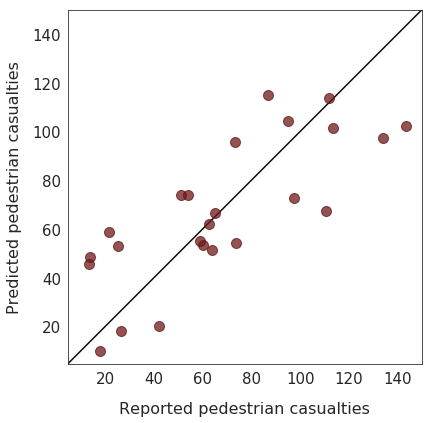

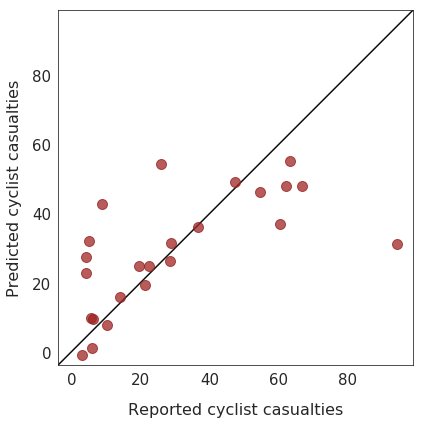

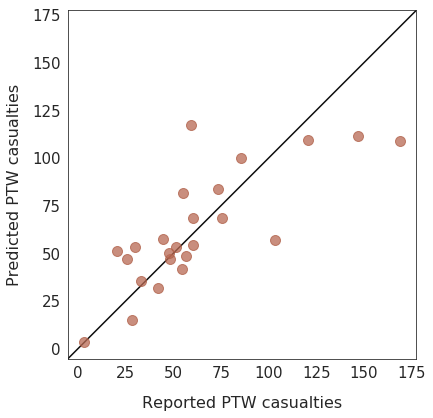

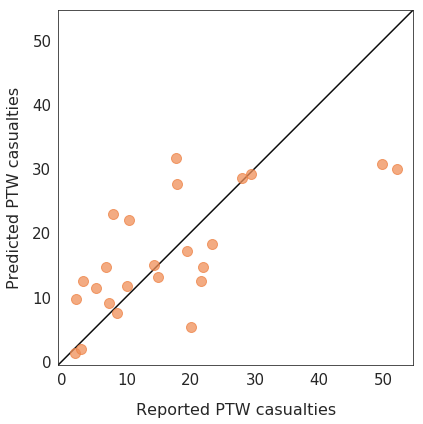

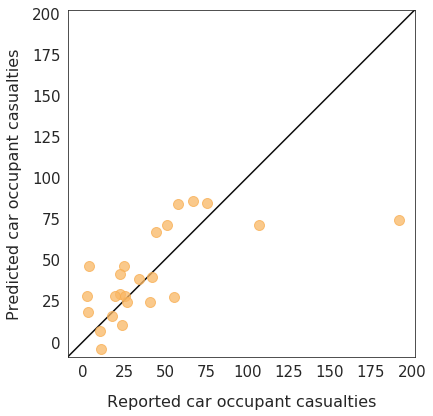

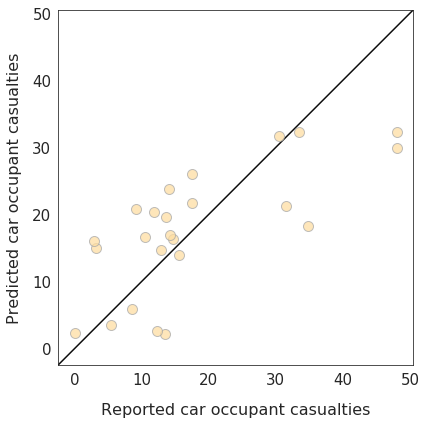

In [9]:
# standardizing the target variable
import itertools
sns.set_style('white')
s=var
#number of variables
size_sb=2
nb_subsets=len([set(i) for i in itertools.combinations(s, size_sb)])
cl_i=['#701919','#a12424','#b86953','#f08f58','#f9b765','#fedea3']
ecl_i=['#601515','#912020','#af5f48','#ee8346','#f8ae52','#A9A9A9']

for (i,cs,cl,ecl) in  [('Pedestrian - Car/Taxi','pedestrian',cl_i[0],ecl_i[0]),
       ('Cyclist - Car/Taxi','cyclist',cl_i[1],ecl_i[1]), ('PTW occ. - Car/Taxi','PTW',cl_i[2],ecl_i[2]), 
                       ('PTW occ. - Itself','PTW',cl_i[3],ecl_i[3]),
       ('Car/Taxi occ. - Car/Taxi','car occupant',cl_i[4],ecl_i[4]),
                       ('Car/Taxi occ. - Itself','car occupant',cl_i[5],ecl_i[5])]:
     
    
    scalery = StandardScaler(with_std=True)
    data.loc[:, i] = scalery.fit_transform(data.loc[:, i].to_numpy().reshape(-1,1))
    
    
    y = data.loc[:, i]

    #aic= []
    aic_best=1000000000
    for j in range(nb_subsets):
        var_sb=list([set(k) for k in itertools.combinations(s, size_sb)][j])
        X = data[var_sb]
    
        X = sm.add_constant(X)
        final = sm.OLS(y, X).fit()
        p = final.params
        #print (var_sb)
        if final.aic<aic_best:
            aic_best=final.aic
            var_best=var_sb
    print (i)
    print (aic_best)
    print (var_best)
    
    X = data[var_best]
    
    X = sm.add_constant(X)
    final = sm.OLS(y, X).fit()
    p = final.params
    cols = var_best
    results = pd.DataFrame([final.params, final.pvalues, final.bse]).T.rename(columns={0: "parameters", 1: 'p values', 2: 'std'},index={0: 'constant', 1: cols[0], 2: cols[1]})
    
    fig, ax = plt.subplots(figsize=(6,6))
    
     # inverse transformation of the data
    y_pred_inversed = scalery.inverse_transform(final.fittedvalues)
    y_inversed = scalery.inverse_transform(y)
                                                                              
    ax.scatter(y_inversed, y_pred_inversed, marker= 'o', color= cl, s= 100, alpha= 0.75, edgecolors= ecl)
    ax.set_xlabel('Reported ' + str(cs) + ' casualties', labelpad=15, size=16, **afont)
    ax.set_ylabel('Predicted '+ str(cs) + ' casualties', labelpad=10, size=16, **afont)
    plt.xticks(fontsize=15, **afont)
    plt.yticks(fontsize=15, **afont)
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
            np.max([ax.get_xlim(), ax.get_ylim()])]  # max of both axes


    ax.plot(lims, lims, 'k-', alpha=0.95, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)


    fig.tight_layout()
 
    name=str(i).replace(" ","") 
    plt.savefig('fig_paper/scatter_plot_'+ str(name).replace("/","_") + '.pdf',bbox_inches='tight')
    conf_int = final.conf_int()
    results['[0.025'] = conf_int.iloc[:,0]
    results['0.975]'] = conf_int.iloc[:,1]
    print (results)
    for j in cols:
        res.loc[j,i]=results.loc[j,'parameters']
    for j in cols:
        res_p.loc[j,i]=results.loc[j,'p values']
    res_perf.loc['AIC',i]=final.aic
    res_perf.loc['Adjusted $R^2$',i]=final.rsquared_adj
    
        
        
    
    
    
   
   


    

    

In [10]:
res_all=res.copy()

In [11]:
res.drop('Avg income per capita (EUR)',inplace=True)

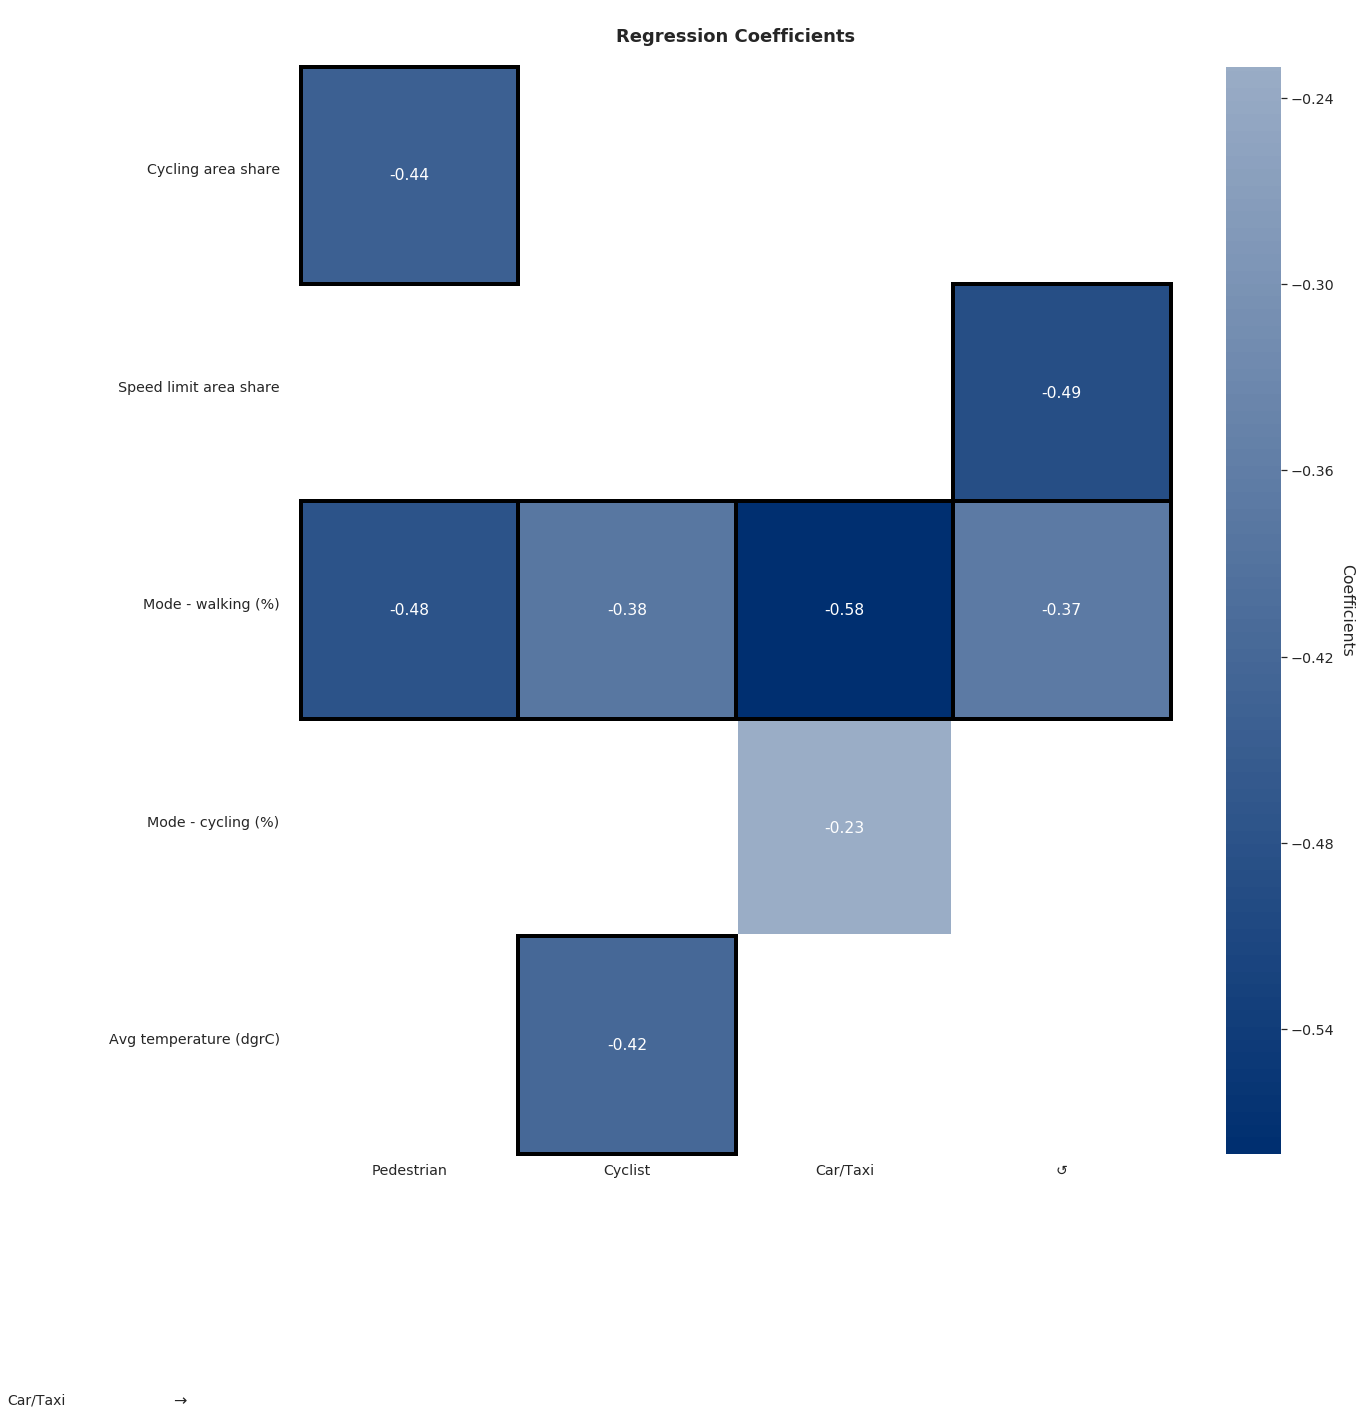

In [12]:

res.drop(['PTW occ. - Itself', 'PTW occ. - Car/Taxi'], axis=1, inplace=True)
res.dropna(axis=0,how='all',inplace=True)
# showing the regression coefficients heatmap

cmap = LinearSegmentedColormap.from_list('mycmap', ['#002f70', 'white', '#fdffbd'])

fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.3)

with sns.axes_style("white"):
    hmap = sns.heatmap(res.values.astype(float).round(2), xticklabels= True, yticklabels=True,
                       square=True, center=0, #mask=res.isnull(), 
                       annot=True, linewidths=3, #annot_kws={"color": 'black'},
                       cmap=cmap)
hmap.set_xticklabels(labels= ['Pedestrian', 'Cyclist', 'Car/Taxi', '$\circlearrowleft$'], 
                     rotation= 0, ha="center", rotation_mode="anchor")

hmap.set_yticklabels(labels= res.index, 
                     rotation= 0, ha="right", rotation_mode="anchor")
hmap.tick_params(axis='y', which='major', pad=15)
hmap.collections[0].colorbar.set_label("Coefficients", rotation= -90, labelpad= 20)
plt.title('\nRegression Coefficients', loc='center', fontsize=18, weight='bold', pad=25)
plt.text(-1.35,6.15,'Car/Taxi', fontsize=14)
plt.text(-0.6,6.15,r'$\rightarrow$', fontsize=16)

hmap.add_patch(Rectangle((0, 2), 1, 1, fill=False, edgecolor='black', lw=4, clip_on=False))
hmap.add_patch(Rectangle((0, 0), 1, 1, fill=False, edgecolor='black', lw=4, clip_on=False))
hmap.add_patch(Rectangle((1, 2), 1, 1, fill=False, edgecolor='black', lw=4, clip_on=False))
hmap.add_patch(Rectangle((2, 2), 1, 1, fill=False, edgecolor='black', lw=4, clip_on=False))
hmap.add_patch(Rectangle((3, 1), 1, 1, fill=False, edgecolor='black', lw=4, clip_on=False))
hmap.add_patch(Rectangle((3, 2), 1, 1, fill=False, edgecolor='black', lw=4, clip_on=False))
hmap.add_patch(Rectangle((1, 4), 1, 1, fill=False, edgecolor='black', lw=4, clip_on=False))
#hmap.add_patch(Rectangle((1, 2), 1, 1, fill=False, edgecolor='black', lw=4, clip_on=False))
#hmap.add_patch(Rectangle((2, 2), 1, 1, fill=False, edgecolor='black', lw=4, clip_on=False))
#hmap.add_patch(Rectangle((3, 1), 1, 1, fill=False, edgecolor='black', lw=4, clip_on=False))

#plt.show()
plt.savefig('fig_paper/heatmap_results_accidents_aic.pdf',bbox_inches='tight')

In [13]:
res_p

,Pedestrian - Car/Taxi,Cyclist - Car/Taxi,PTW occ. - Car/Taxi,PTW occ. - Itself,Car/Taxi occ. - Car/Taxi,Car/Taxi occ. - Itself
Density (pop./ sq km),NaN,NaN,NaN,NaN,NaN,NaN
Cycling area share,0.00910185,NaN,0.0190019,NaN,NaN,NaN
Speed limit area share,NaN,NaN,NaN,0.0722151,NaN,0.00767413
Mode - walking (%),0.004348,0.0444772,NaN,NaN,0.0024273,0.0378584
Mode - cycling (%),NaN,NaN,NaN,NaN,0.179408,NaN
Mode - public transport (%),NaN,NaN,NaN,NaN,NaN,NaN
Avg yearly precipitation (mm),NaN,NaN,NaN,NaN,NaN,NaN
Avg temperature (dgrC),NaN,0.0268948,5.5728e-05,0.000652585,NaN,NaN
Avg income per capita (EUR),NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
res_all

,Pedestrian - Car/Taxi,Cyclist - Car/Taxi,PTW occ. - Car/Taxi,PTW occ. - Itself,Car/Taxi occ. - Car/Taxi,Car/Taxi occ. - Itself
Density (pop./ sq km),NaN,NaN,NaN,NaN,NaN,NaN
Cycling area share,-0.435878,NaN,-0.352914,NaN,NaN,NaN
Speed limit area share,NaN,NaN,NaN,-0.298376,NaN,-0.487488
Mode - walking (%),-0.484798,-0.375769,NaN,NaN,-0.577043,-0.366423
Mode - cycling (%),NaN,NaN,NaN,NaN,-0.232649,NaN
Mode - public transport (%),NaN,NaN,NaN,NaN,NaN,NaN
Avg yearly precipitation (mm),NaN,NaN,NaN,NaN,NaN,NaN
Avg temperature (dgrC),NaN,-0.418312,0.698657,0.630176,NaN,NaN
Avg income per capita (EUR),NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
res_perf

,Pedestrian - Car/Taxi,Cyclist - Car/Taxi,PTW occ. - Car/Taxi,PTW occ. - Itself,Car/Taxi occ. - Car/Taxi,Car/Taxi occ. - Itself
AIC,52.5174,61.2572,52.3875,58.4834,61.0664,57.3858
Adjusted $R^2$,0.554554,0.35887,0.556959,0.428846,0.363946,0.454378


In [16]:
res_all=res_all.append(res_perf)

In [17]:
res_all.fillna('-',inplace=True)

In [18]:
res_all

,Pedestrian - Car/Taxi,Cyclist - Car/Taxi,PTW occ. - Car/Taxi,PTW occ. - Itself,Car/Taxi occ. - Car/Taxi,Car/Taxi occ. - Itself
Density (pop./ sq km),-,-,-,-,-,-
Cycling area share,-0.435878,-,-0.352914,-,-,-
Speed limit area share,-,-,-,-0.298376,-,-0.487488
Mode - walking (%),-0.484798,-0.375769,-,-,-0.577043,-0.366423
Mode - cycling (%),-,-,-,-,-0.232649,-
Mode - public transport (%),-,-,-,-,-,-
Avg yearly precipitation (mm),-,-,-,-,-,-
Avg temperature (dgrC),-,-0.418312,0.698657,0.630176,-,-
Avg income per capita (EUR),-,-,-,-,-,-
AIC,52.5174,61.2572,52.3875,58.4834,61.0664,57.3858


In [19]:
res_all.to_latex(buf='table'+ str(size_sb)+ 'var.tex')